<a href="https://colab.research.google.com/github/HPashchenko/modelling_data_analyst/blob/main/HW_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [48]:
!pip install mysql-connector-python

In [51]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd


назва хоста: 3.68.62.36

імʼя користувача: user1

пароль: 7oygWy6P

назва бази даних: employees

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [52]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host= '3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [57]:
cursor = con.cursor()

sql = """
SELECT MAX(hire_date), MIN(hire_date)
FROM employees
"""

cursor.execute(sql)

In [58]:
cursor.fetchall()


[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [59]:
cursor = con.cursor()
sql_1 = """
SElECT s.emp_no, s.salary, s.from_date, s.to_date
FROM salaries s
JOIN (
    SELECT emp_no, MAX(to_date) as max_date
    FROM salaries
    GROUP BY emp_no) temp
ON s.emp_no = temp.emp_no AND s.to_date = temp.max_date
"""
cursor.execute(sql_1)

In [60]:
data=cursor.fetchall()


In [61]:
field_names = [i[0] for i in cursor.description]

In [62]:
res = pd.DataFrame(data, columns=field_names)

In [63]:
display(field_names)

['emp_no', 'salary', 'from_date', 'to_date']

In [64]:
res.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [65]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300180 entries, 0 to 300179
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300180 non-null  int64 
 1   salary     300180 non-null  int64 
 2   from_date  300180 non-null  object
 3   to_date    300180 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.2+ MB


In [66]:
res.loc[0].to_date

datetime.date(9999, 1, 1)

In [70]:
#даний варіант був сформований з допомогою Ганни Палієвої
cursor = con.cursor()
sql_2 = """
SELECT
-- to_date,
    sum(CASE
        WHEN to_date = DATE('9999-01-01') THEN 1
        ELSE 0
    END) AS is_date,
    sum(CASE
        WHEN to_date = DATE('9999-01-01') THEN 0
        ELSE 1
    END )AS not_date
FROM salaries
"""
cursor.execute(sql_2)


In [71]:
cursor.fetchall()

[(Decimal('240124'), Decimal('2603923'))]

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [72]:
import matplotlib.pyplot as plt

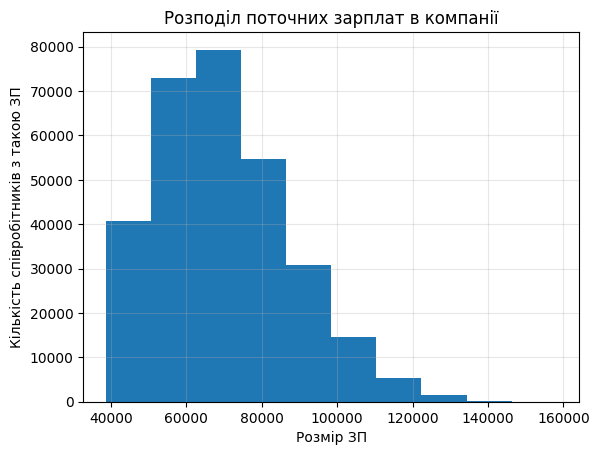

In [75]:
plt.hist(res.salary, bins=10)
plt.grid(axis='both', alpha=.3)
plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [76]:
con.close()